# Homework 3
## Name: Yuqian Wang, Jihan Gao
## Course: CMSC320
## Instructor: John Dickerson

# Part 1: Regression analysis of Gapminder data
## Exercise 1
####  Make a scatter plot of life expectancy across time.



       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


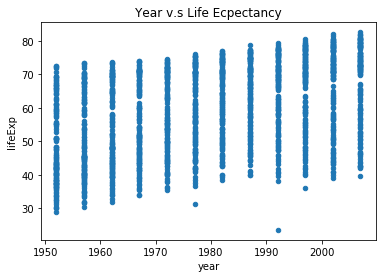

In [93]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

data = pd.read_csv("gap.tsv", sep='\t')
print(data.head())

##Scatter plot on lifeExp vs. year
data.plot.scatter(x = 'year', y = 'lifeExp')
plt.title('Year v.s Life Ecpectancy')
plt.show()



#### Qustion 1:Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear? (answering this qualitatively from the plot, you will do a statistical analysis of this question shortly)
 
The general trend for life expectency is increasing over time. The trend is approximately linear.

#### Question 2:How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?
 
Most of the year, the distribution of life expectancy across countries are skewed. More specifically, years before 1967 the distribution is right-skewed and in years after 1972 they are left-skewed. Except 1962 and 1967, all other plots are unimodal because they have a single highest value. The plots are not symetric. Because on the left side, the center of the data is much smaller than that of the right side.
 
 
#### Question 3: Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? (do this without fitting the model yet. I am testing your intuition.)
 
 I will reject the null hypothesis of no relationship because there is a clear trend that the life expectancy is increasing over years. At early years, the distribution is skewed right. It then moves upward and finally in the last few years, it becomes left-skewed. Each year the life expectancy seems to increase at a constant rate. 
 
#### Question 4: What would a violin plot of residuals from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively)
 
 The shape of violin plot of residuals will look similar as the shape of the original violin plot.
  
#### Question 5: According to the assumptions of the linear regression model, what should that violin plot look like?
 
For each year, the plot of residuals should be centered, approximately, around 0. In addition, the shape of the plot should be similar with the lifeExp over time plot.

## Exercise 2
####  Fit a linear regression model using, e.g., the LinearRegression function from Scikit-Learn or the closed-form solution we derived in class, for life expectancy vs. year (as a continuous variable).

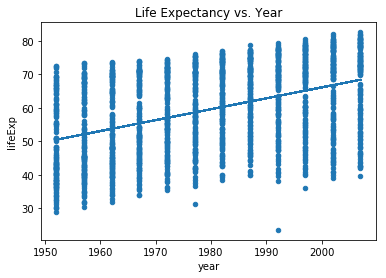

Coefficients: [[ 0.32590383]]
                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Sun, 23 Apr 2017   Prob (F-statistic):           7.55e-80
Time:                        22:17:53   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -585.6522 

In [94]:
# We use sklearn package to build a simple linear regression model 
# with dependent variable life expectancy and independent varibale year. 
reg_simple = linear_model.LinearRegression()

# Convert horizontal array into a vector. 
yearlist = np.transpose([data['year'].tolist()])
lifeExplist = np.transpose([data['lifeExp'].tolist()])

reg_simple.fit(yearlist,lifeExplist)
data.plot.scatter(x = 'year', y = 'lifeExp')
plt.plot(yearlist, reg_simple.predict(yearlist))
plt.title('Life Expectancy vs. Year')
plt.show()


print('Coefficients:', reg_simple.coef_)

est_simple = ols('lifeExp ~ year', data = data).fit()
print(est_simple.summary())


#### Question 6: On average, by how much does life expectancy increase every year around the world?
 Life expectancy increase by 0.32590383 every year.


####  Question 7: Do you reject the null hypothesis of no relationship between year and life expectancy? Why?
 Based on our statistical analysis, we reject the null hypothesis. Because the p-value(0.000) we obtained is very small, which indicates there exists a linear relationship between attribute year and life expectancy. 


## Exercise 3

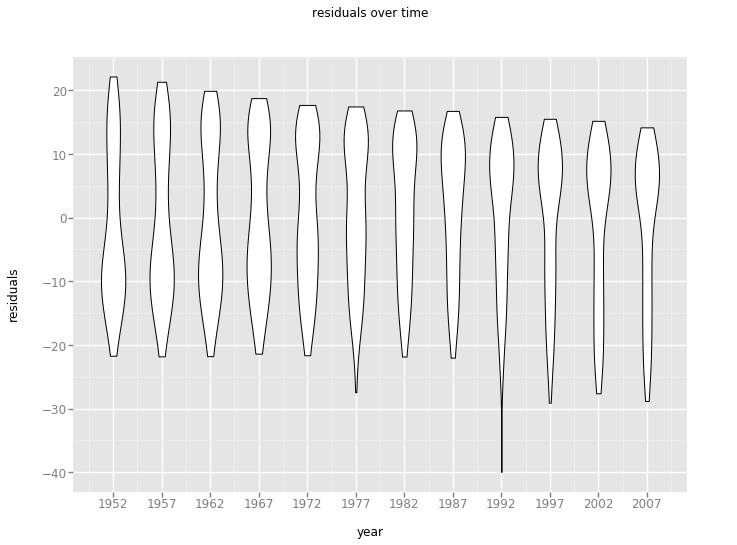

<ggplot: (128777373795)>

In [95]:
from ggplot import *


residual = lifeExplist - reg_simple.predict(yearlist)
data['residual'] = np.transpose(residual)[0]

ggplot(aes(x='year', y='residual'), data=data) +\
    geom_violin() +\
    labs(title="residuals over time",
         x = "year",
         y = "residuals")


#### Question 8: Does the plot of Exercise 3 match your expectations (as you answered Question 4)?

 Yes, the plot match our expectations. The shape is similar with violin plot that measures year and life expectancy. The center is around 0, which corresponds to answers in question 4.

### Exercise 4

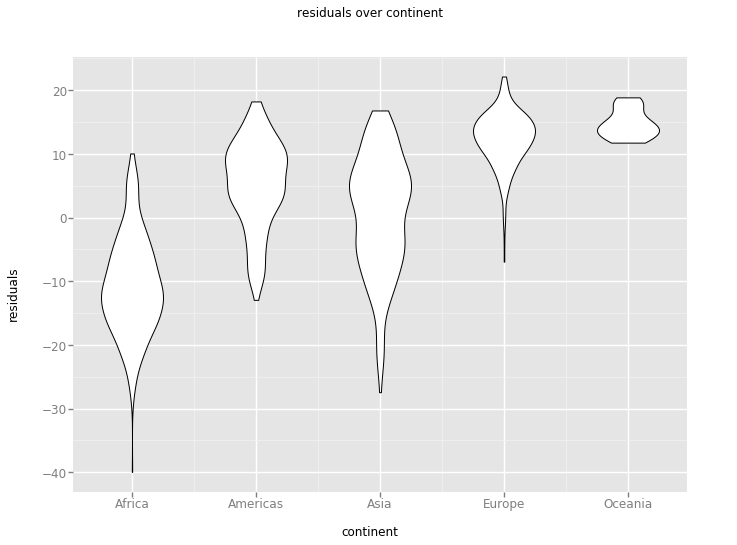

<ggplot: (-9223371908077442125)>

In [96]:

ggplot(aes(x='continent', y='residual'), data=data) +\
    geom_violin() +\
    labs(title="residuals over continent",
         x = "continent",
         y = "residuals")

#### Question 9: Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

From the violin plot, we see that the residual plot of different continents differ vastly. This shows a dependency between continent and residual. Therefore, when we are performing the regression analysis, we should take variable continent into consideration instead of just year. 

### Exercise 5

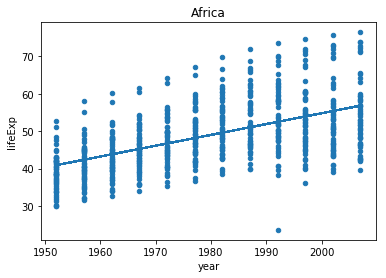

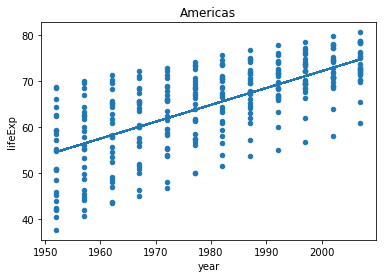

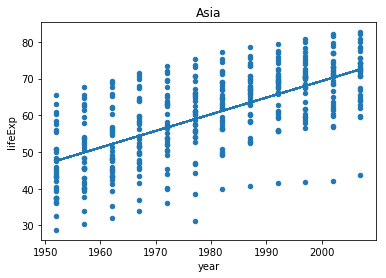

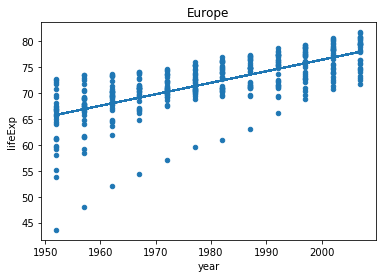

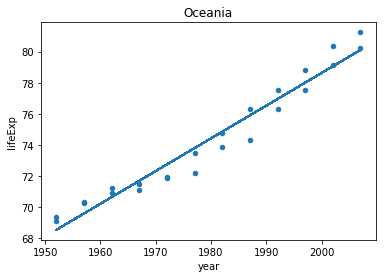

In [97]:
continent_group = data.groupby('continent')
for k, g in continent_group:
    g.plot.scatter(x = 'year', y = 'lifeExp', title = k)
    z = np.polyfit(g['year'], g['lifeExp'] , deg = 1, full = False)
    plt.plot(data['year'], z[0]*data['year'] + z[1])
    
plt.show()


#### Question 10: Based on this plot, should your regression model include an interaction term for continent and year? Why?
Yes we should because life expectency is affected by varibale continent. People from differnet continents have different life expectency model. In general, people from Europe and Oceania have relative higher life expectaion, and people from contients like Africa siginificantly lowers the average life expectancy.


## Exercise 6

In [98]:

##For exercise 6, we include an interactive term, 
##which adds the effect of not only time but also continent into our model.

est_multi = smf.ols(formula = 'lifeExp ~ year * continent', data = data).fit()

##df_result is a dataframe used to store the parameters of each case of the interactive variable. The result is used to 
##answer Question 11 and 12. 
df_result = pd.DataFrame()
continent_list = ['year:Africa', 'year:Americas', 'year:Asia', 'year:Europe', 'year:Oceania']
params_list = (est_multi.params['year'], (est_multi.params['year:continent[T.Americas]'] + est_multi.params['year']), 
               est_multi.params['year:continent[T.Asia]'] + est_multi.params['year'], 
               est_multi.params['year:continent[T.Europe]'] + est_multi.params['year'], 
               est_multi.params['year:continent[T.Oceania]'] + est_multi.params['year'])

               
df_result['continent_list'] = continent_list
df_result['params_list'] = params_list

print(df_result)


  continent_list  params_list
0    year:Africa     0.289529
1  year:Americas     0.367651
2      year:Asia     0.453122
3    year:Europe     0.221932
4   year:Oceania     0.210272


#### Question 11: Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?

Not all parameters are significantly different from zero. Based on parametes that we get from above table, the parameter of Aisa is significantly different from zero(0.453122). Other continents are close to zero. 

#### Question 12: On average, by how much does life expectancy increase each year for each continent? (Provide code to answer this question by extracting relevant estimates from model fit)

From the printed dataframe(df_result), the average increase of life expectancy of Africa per year, which is indicated by the slope, is 0.289529. Similarly, the average increase is 0.367651, 0.453122, 0.221932, 0.210272 for continent Americas, Asia, Europe and Oceania respectively.  

### Exercise 7:Perform an F-test that compares how well two models fit your data: (a) the linear regression models from Exercise 2 (only including year as a covariate) and (b) Exercise 6 (including interaction between year and continent).

See two table printed below:

In [99]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
print('Simple covariate(year) model:')
print(sm.stats.anova_lm(est_simple, typ= 2))
print('\n')

print('Multiple covariate(year and continent) model:')
print(sm.stats.anova_lm(est_multi, typ= 2))


Simple covariate(year) model:
                 sum_sq      df           F        PR(>F)
year       53919.184217     1.0  398.604746  7.546795e-80
Residual  230229.199536  1702.0         NaN           NaN


Multiple covariate(year and continent) model:
                       sum_sq      df            F         PR(>F)
continent       139343.165924     4.0   675.811593   0.000000e+00
year             53919.184217     1.0  1046.027900  4.048499e-179
year:continent    3566.089198     4.0    17.295462   6.463379e-14
Residual         87319.944414  1694.0          NaN            NaN


### Question 13: Is the interaction model significantly better than the year-only model? Why?

A better model should have a lower F-test value. Based on the two table that we generated from Excercise 2 and 6, we see that the multiple covariate model has a relative small F-test value(17.29), which is significantly higher than the simple covariate model(398). So the interaction model is better. 

## Exercise 8: Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model. Do the same for a residuals vs. fitted values model.

### residuals vs. year:

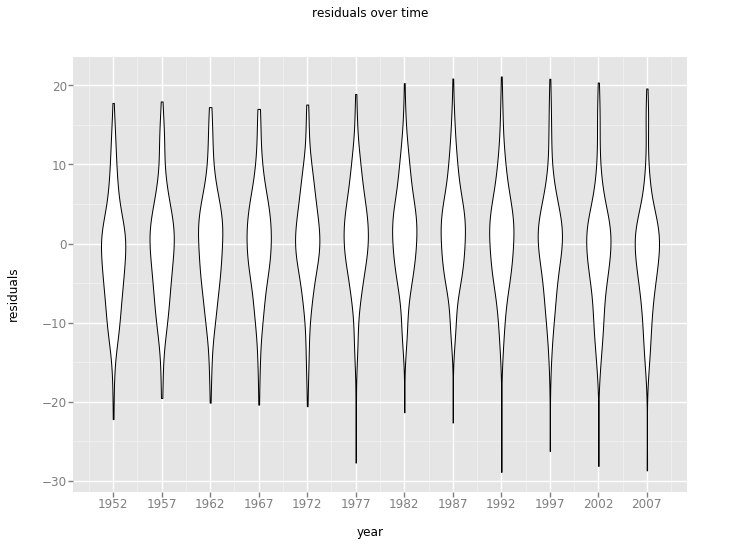

<ggplot: (128777236323)>

In [100]:
fit_value = est_multi.predict(data[['year','continent']])

multi_residual = data['lifeExp'] - fit_value

ggplot(aes(x='year', y='multi_residual'), data=data) +\
   geom_violin() +\
   labs(title="residuals over time",
        x = "year",
        y = "residuals")


#### Comment on how well it matches assumptions of the linear regression model:

The residuals are symmetric for each year. These plots are of similar shape and distributed around zero. This random pattern indicates that a linear model provides a good fit to the data. 

### Residuals vs. fitted values

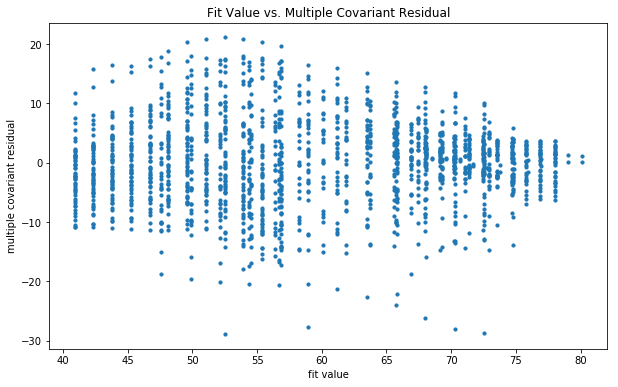

In [101]:
plt.subplots(figsize = (10,6))
plt.scatter(x = fit_value, y = multi_residual,s=10)
plt.xlabel('fit value')
plt.ylabel('multiple covariant residual')
plt.title('Fit Value vs. Multiple Covariant Residual')

plt.show()

#### Comment：

In a residual v.s fitted_value plot, the distance from the line at 0 reflects how bad the prediction is for a specific value. A healthy plot of a linear regresson model should be symmetric and cluster towards the middle line. The plot we get is pretty symmetric. However, the distance from line 0 is quite large for a considerable portion of points, which shows inaccuracy. There are several outliers that could be observed from the point.

## Part 2 : Classification

### Problem 1



In [102]:
# This function implemented gradient descent algorith for generalized multi variable linear regression
# Function return a tuple of theta and loss
def grad_descent(X, y, T, alpha):
    m, n = X.shape                  # m = #examples, n = #features
    theta = np.zeros(n)             # initialize parameters
    f = np.zeros(T)                 # track loss over time
    for i in range(T):             
        f[i] = 0.5*np.linalg.norm(X.dot(theta)-y)**2         # loss for current parameter vector theta
        g = X.T.dot(X.dot(theta)-y)                          # compute steepest ascent at f(theta)
        theta = theta-alpha*g                                # step down the gradient
    return theta, f




### Problem 2
Our logistic hypothesis function 
$$h_\theta(x) = \frac{1}{1+e^{-\theta^{T}x}}$$

Given the equation, we are going to find a best $\theta$ that fits our model.
We start by initializing the  theta to 0.
The probability of us getting the correct prediction is 

$$p(y\mid x;\theta) = (h_{\theta}(x))^y(1-h_{\theta}(x))^{1-y}$$

Therefore, we would like to maximize the likelihood.  In order to do this, we are going
to work on the log of it. For a dataset with sample size m, the likelihood function is 

$$\begin{align}
L(\theta) &= p(\vec{y}\mid X;\theta) \\
&= \prod_m^{i=1}(h_{\theta}x_{i}))^{y_{i}}(1-h_{\theta}x_{i})^{1-y_{i}}
\end{align}$$

$$ l(\theta) = logL(\theta) = \sum_1^my^{(i)}log(h(x^{(i)})) + (1-y^{(i)})log(1-h(x^{(i)}))$$

Since we are using gradient descent, we need to compute the gradient next.

$$\begin{align}
\frac{\partial }{\partial \theta_{j}}l(\theta) &= (y\frac{1}{h_\theta(x)} - (1-y)\frac{1}{1-h_\theta(x)})\frac{\partial }{\partial \theta^{T}x}h_\theta(x)x)\\&= (y(1 - h_\theta(x)) - (1-y)h_\theta(x)x_{j} \\&= (y - h_\theta(x))x_{j}
\end{align}$$

Gradient equals to $$(y - h_\theta(x))\bf{x}$$

Because we are trying the maximize the likelihood, addtion is used instead of subtraction.The update function is written as


$$\theta_{j} := \theta_{j}+\alpha((y - h_\theta(x))\bf{x}$$


### Problem 3

In [103]:
# These two function implemented gradient descent for logistic linear regression 
# Function return a tuple of theata and loss

def grad_help(X, y, theta):
    m, n = X.shape             # m = #examples, n = #features
    f = np.zeros(m)            # linear model
    g = np.zeros(n)            # gradient
    p = np.zeros(m)            # store predicted_y
    for i in range(m): 
        f[i] = theta.dot(X[i]) 
        p[i] = np.exp(f[i])/(1 + np.exp(f[i]))  
        g += (y[i] - p[i])*(X[i])
    return g, p


def grad_descent_log(X, y, T, alpha):
    m, n = X.shape                  # m = #examples, n = #features
    theta = np.zeros(n)             # initialize parameters
    loss = np.zeros(T)                 # track loss over time
    for i in range(T):             
        gradient, predict_y = grad_help(X, y, theta)    # compute steepest ascent at f(theta)
        loss[i] = (1/(np.log(2)) * np.log(1 + np.exp(-(predict_y * y)))).sum()  # loss for current parameter vector theta
        theta = theta + gradient * alpha                                # step down the gradient
    
    return theta, loss



### Problem 4

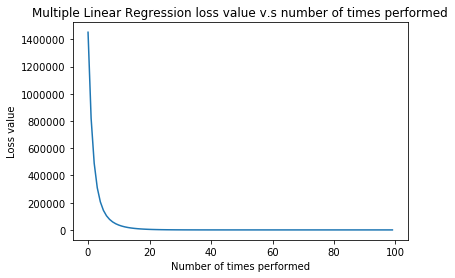

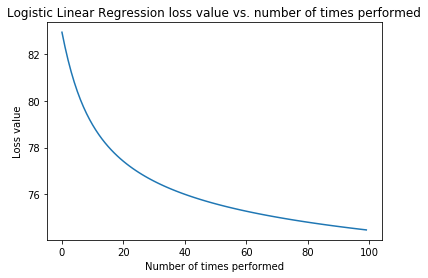

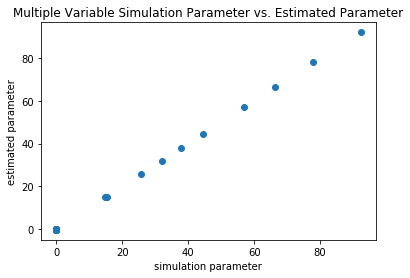

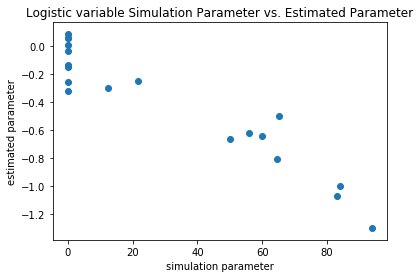

In [104]:
from sklearn import datasets

gen_data_x, gen_data_y, coef_multi= datasets.make_regression(n_samples=100, n_features=20, noise = 1.5, coef = True)
theta_multi, loss_multi = grad_descent(gen_data_x, gen_data_y, 100, 0.002)

plt.plot(loss_multi)
plt.xlabel('Number of times performed')
plt.ylabel('Loss value')
plt.title('Multiple Linear Regression loss value v.s number of times performed')
plt.show()

log_gen_data_x, dump_y, coef_log = datasets.make_regression(n_samples=100, n_features=20, noise = 1.5, coef = True)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]
theta_log, loss_log = grad_descent_log(log_gen_data_x, log_gen_data_y, 100, 0.002)

plt.plot(loss_log)
plt.xlabel('Number of times performed')
plt.ylabel('Loss value')
plt.title('Logistic Linear Regression loss value vs. number of times performed')
plt.show()

#theta_log = [np.log(i) for i in theta_log]
plt.scatter(x = coef_multi, y = theta_multi)
plt.title('Multiple Variable Simulation Parameter vs. Estimated Parameter')
plt.xlabel('simulation parameter')
plt.ylabel('estimated parameter')
plt.show()

plt.scatter(x = coef_log, y = theta_log)
plt.title('Logistic variable Simulation Parameter vs. Estimated Parameter')
plt.xlabel('simulation parameter')
plt.ylabel('estimated parameter')
plt.show()



#### Comment on how gradient descent implementation is working:

We plot the loss value v.s. time graphs. It is clear that the loss is decreasing.
The points on the multiple linear regression estimated parameter v.s simulation parameter graphs falls in a line which forms a roughly 45 degree angle with x axis, which indicates that the estimated parameter is approximately the same as the simulation parameter.

However, on the last graph(logitic regression estimated parameter v.s simulation parameter),the estimated parameter doesn't make sense when compare to simulated parameter.Because gen_data_x and dump_y has a linear relationship. log_gen_data_y is classified based on dump_y. There is no clear relationtion between the estimated parameter with the simulation parameter. Therefore, the simulated parameter doesn't apply to logistic regression model.


## Try it out

#### We import Studentent Performance Data set from online(access at http://archive.ics.uci.edu/ml/datasets/Student+Performance).  We choose Linear SVC and Random Forest, and compare their prediction performance to gradient descent logistic regression.

In [105]:

# We import Student Performance Data Set (access at http://archive.ics.uci.edu/ml/datasets/Student+Performance) 
# For this dataset, we choose independent variable: G3(final grade), absences and age
# The dependent variable: higher(wants to take higher education). Because we believe that the above independent variables
# would influence the outcome. For example, higher  final grade, less absesces and younger age will result in higher chances
# of taking higher education.

ourData = pd.read_csv('student-por.csv',delimiter = ';')
input_x = []
input_y = []
input_x.append(ourData['G3'])
input_x.append(ourData['age'])
input_x.append(ourData['absences'])
input_x = np.transpose(input_x)                   

for index, row in ourData.iterrows():              # transfer yes/no into 1/0
    input_y.append(1 if row['higher'] == 'yes' else 0)
input_y = np.array(input_y)

print(ourData.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other ...   
3     GP   F   15       U     GT3       T     4     2   health  services ...   
4     GP   F   16       U     GT3       T     3     3    other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [2]:
# Comparing cross validation score of Linear SVC and Random Forest to the result of logistic regression gradient descent.
from sklearn.cross_validation import cross_val_score

## Linear SVC
from scipy import stats
from sklearn.svm import LinearSVC

result_SVC = []
clf_SVC = LinearSVC()
result_SVC = cross_val_score(clf_SVC, input_x, input_y, cv = 10)

print('Linear SVC:')
print (result_SVC)
print('\n')
print('Standard error for Linear SVC:')
print(stats.sem(result_SVC))
print('\n')


#K nearest neighbour
from sklearn.ensemble import KFold
## Random forest
from sklearn.ensemble import RandomForestClassifier

result_RF = []
clf_RF = RandomForestClassifier()
result_RF = cross_val_score(clf_RF, input_x, input_y, cv = 10)

print('Random Forest:')
print(result_RF)    
print('\n')
print('Standard error for Random Forest:')
print(stats.sem(result_RF))
print('\n')



# Logistic regression gradient descent
from sklearn.model_selection import KFold

log_result = []
kf = KFold(n_splits=10)
for train, test in kf.split(input_y):
    theta, loss = grad_descent_log(input_x[train], input_y[train], 100, 0.0001)   # Retrieve theta from logistic regression            
    pre_log_y = np.exp(input_x[test].dot(theta))/(1 + np.exp(input_x[test].dot(theta)))>=0.5
    log_result += [(pre_log_y == input_y[test]).mean()]
    
print('Logistic Regression:')
print(log_result)
print('\n')
print('Standard error for Logistic Regression:')
print(stats.sem(log_result))
print('\n')
# Do pair t test on both K Nearest Neighbour and Random forest algorithms.
from scipy import stats
print(stats.ttest_rel(log_result,result_SVC))
print(stats.ttest_rel(log_result,result_RF))


NameError: name 'input_x' is not defined

#### Writeup the result of your 10-fold cross-validation procedure. Make sure to report the 10-fold CV error estimate (with standard error) of each of the three algorithms. Also report on the result of the two paired tt-tests comparing your logistic regression algorithm with your chosen two algorithms.

We use accuracy for error estimate. Accuracy is the pecentage of getting the correct prediction. The standard deviation for each algorithm is 0.01547, 0.01881 and 0.027719 for linear SVM, Random forest, and logistic regression. Overall, those values are small which shows a small variance inside each sample. A good model should have a small standard deviation because we want our predictions to be stable. To compare, the linear SVM model is the best fit with gradienct descent logistic model performs the worst. 

Paired t test is used to determine whether the mean of two relative sets of data equals 0 or significantly not. Generally speaking, if p-value is less than 0.05(CI = 95%), we tend to reject the null hypothesis. Therefore, after perfroming two t test, we find that both p-values are far greater than 0.005. This means the mean of difference between scores of linear SVC and logistic regression and the mean of difference between scores of Random Forest and logistic regression are both equals to 0. Results are almost the same between pairs, which indicates a good logistic model. 